In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Define model and Loss

class Model(object):
    def __init__(self):
        self.W = tf.Variable(10.0)
        self.b = tf.Variable(-5.0)

    def __call__(self, inputs):
        return self.W * inputs + self.b

def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

In [3]:
model = Model()

In [4]:
# Define True weight and bias

TRUE_W = 3.0
TRUE_b = 2.0

In [5]:
# Obtain training data, Let's synthesize the training data with some noise.

NUM_EXAMPLES = 1000
inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

In [7]:
# Before we train the model let's visualize where the model stands right now.
# We'll plot the model's predictions in red and the training data in blue.

def plot(epoch):
    plt.scatter(inputs, outputs, c='b')
    plt.scatter(inputs, model(inputs), c='r')
    plt.title("epoch %2d, loss = %s" %(epoch, str(compute_loss(outputs, model(inputs)).numpy())))
    plt.legend()
    plt.draw()
    plt.ion()
    plt.pause(1)
    plt.close()

No handles with labels found to put in legend.


=> epoch  1: w_true= 3.00, w_pred= 8.51; b_true= 2.00, b_pred= -3.61, loss= 101.66


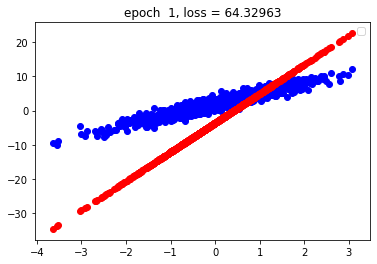

No handles with labels found to put in legend.


=> epoch  2: w_true= 3.00, w_pred= 7.33; b_true= 2.00, b_pred= -2.50, loss= 64.33
=> epoch  3: w_true= 3.00, w_pred= 6.41; b_true= 2.00, b_pred= -1.61, loss= 40.86
=> epoch  4: w_true= 3.00, w_pred= 5.68; b_true= 2.00, b_pred= -0.89, loss= 26.10
=> epoch  5: w_true= 3.00, w_pred= 5.11; b_true= 2.00, b_pred= -0.32, loss= 16.82
=> epoch  6: w_true= 3.00, w_pred= 4.66; b_true= 2.00, b_pred= 0.13, loss= 10.98
=> epoch  7: w_true= 3.00, w_pred= 4.31; b_true= 2.00, b_pred= 0.50, loss= 7.30
=> epoch  8: w_true= 3.00, w_pred= 4.03; b_true= 2.00, b_pred= 0.79, loss= 4.99
=> epoch  9: w_true= 3.00, w_pred= 3.81; b_true= 2.00, b_pred= 1.02, loss= 3.53
=> epoch 10: w_true= 3.00, w_pred= 3.64; b_true= 2.00, b_pred= 1.21, loss= 2.61
=> epoch 11: w_true= 3.00, w_pred= 3.50; b_true= 2.00, b_pred= 1.36, loss= 2.03


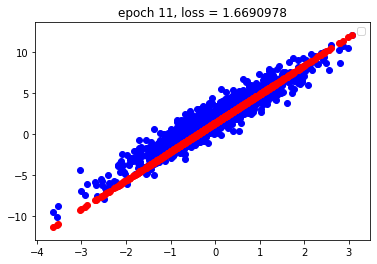

No handles with labels found to put in legend.


=> epoch 12: w_true= 3.00, w_pred= 3.40; b_true= 2.00, b_pred= 1.48, loss= 1.67
=> epoch 13: w_true= 3.00, w_pred= 3.31; b_true= 2.00, b_pred= 1.57, loss= 1.44
=> epoch 14: w_true= 3.00, w_pred= 3.25; b_true= 2.00, b_pred= 1.65, loss= 1.29
=> epoch 15: w_true= 3.00, w_pred= 3.19; b_true= 2.00, b_pred= 1.71, loss= 1.20
=> epoch 16: w_true= 3.00, w_pred= 3.15; b_true= 2.00, b_pred= 1.76, loss= 1.15
=> epoch 17: w_true= 3.00, w_pred= 3.12; b_true= 2.00, b_pred= 1.80, loss= 1.11
=> epoch 18: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 1.83, loss= 1.09
=> epoch 19: w_true= 3.00, w_pred= 3.08; b_true= 2.00, b_pred= 1.85, loss= 1.07
=> epoch 20: w_true= 3.00, w_pred= 3.06; b_true= 2.00, b_pred= 1.87, loss= 1.06
=> epoch 21: w_true= 3.00, w_pred= 3.05; b_true= 2.00, b_pred= 1.89, loss= 1.06


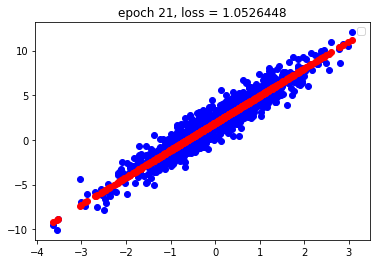

=> epoch 22: w_true= 3.00, w_pred= 3.04; b_true= 2.00, b_pred= 1.90, loss= 1.05
=> epoch 23: w_true= 3.00, w_pred= 3.03; b_true= 2.00, b_pred= 1.91, loss= 1.05
=> epoch 24: w_true= 3.00, w_pred= 3.02; b_true= 2.00, b_pred= 1.92, loss= 1.05
=> epoch 25: w_true= 3.00, w_pred= 3.02; b_true= 2.00, b_pred= 1.93, loss= 1.05
=> epoch 26: w_true= 3.00, w_pred= 3.02; b_true= 2.00, b_pred= 1.93, loss= 1.05
=> epoch 27: w_true= 3.00, w_pred= 3.01; b_true= 2.00, b_pred= 1.94, loss= 1.05
=> epoch 28: w_true= 3.00, w_pred= 3.01; b_true= 2.00, b_pred= 1.94, loss= 1.05
=> epoch 29: w_true= 3.00, w_pred= 3.01; b_true= 2.00, b_pred= 1.94, loss= 1.05
=> epoch 30: w_true= 3.00, w_pred= 3.01; b_true= 2.00, b_pred= 1.95, loss= 1.05


In [8]:
# Define a training loop
learning_rate = 0.1
for epoch in range(30):
    with tf.GradientTape() as tape:
        loss = compute_loss(outputs, model(inputs))

    dW, db = tape.gradient(loss, [model.W, model.b])

    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

    print("=> epoch %2d: w_true= %.2f, w_pred= %.2f; b_true= %.2f, b_pred= %.2f, loss= %.2f" %(
          epoch+1, TRUE_W, model.W.numpy(), TRUE_b, model.b.numpy(), loss.numpy()))
    if (epoch) % 10 == 0: plot(epoch + 1)